<a href="https://colab.research.google.com/github/BenjoCowley/BenjoCowley.github.io/blob/master/code/Lecture9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: PCA on time series

Text(0, 0.5, 'PC2')

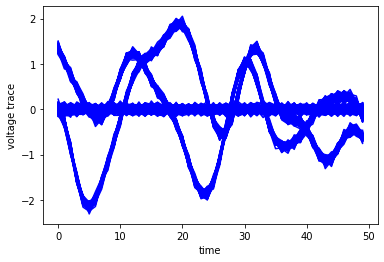

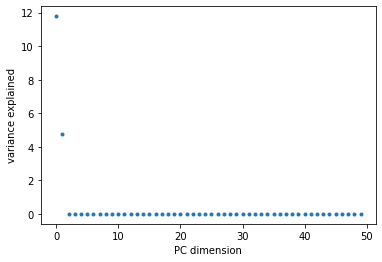

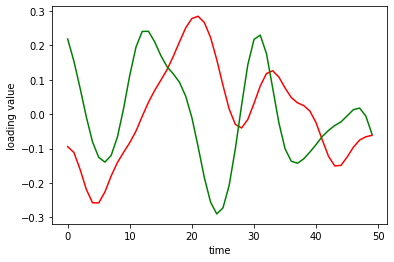

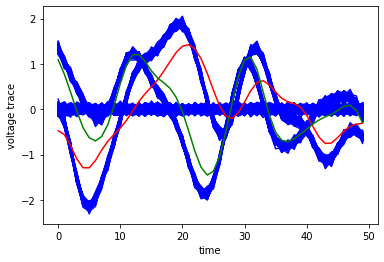

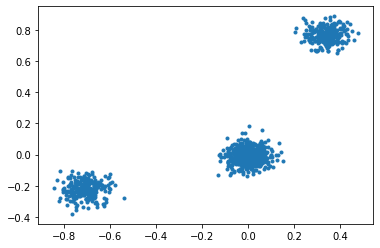

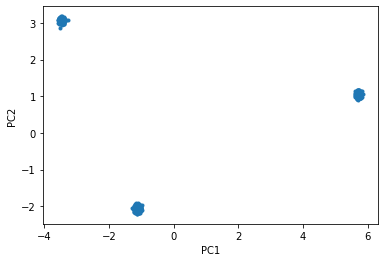

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# generate data
if True:

  # generate templates
  num_timepoints = 50
  Sigma = np.zeros((num_timepoints,num_timepoints))
  for it in range(num_timepoints):
    for jt in range(num_timepoints):
      Sigma[it,jt] = np.exp(-((it-jt)/5)**2)
  temp1 = np.random.multivariate_normal(mean=np.zeros(num_timepoints,), cov=Sigma)
  temp2 = np.random.multivariate_normal(mean=np.zeros(num_timepoints,), cov=Sigma)

  temp1 -= np.mean(temp1)
  temp2 -= np.mean(temp2)
  temp2 = temp2 - np.dot(temp1,temp2) * temp1 / np.sum(temp1**2)

  # generate time series
  num_waveforms = 1000
  waveforms = np.zeros((num_waveforms, num_timepoints))
  for iform in range(num_waveforms):
    if iform < num_waveforms/4:
      waveforms[iform,:] = temp1 + np.random.normal(size=(num_timepoints,), scale=0.05)
    elif iform < num_waveforms/2:
      waveforms[iform,:] = temp2 + np.random.normal(size=(num_timepoints,), scale=0.05)
    else:
      waveforms[iform,:] = np.random.normal(size=(num_timepoints,),scale=0.05)

  # waveforms (num_waveforms x num_timepoints)

# Step 1: Plot waveforms
plt.figure()
num_waveforms = waveforms.shape[0]
for iform in range(num_waveforms):
  plt.plot(waveforms[iform,:], '-b')
plt.xlabel('time')
plt.ylabel('voltage trace')

# Step 2: Apply PCA
pca = PCA()

pca.fit(waveforms)

# Step 3: Plot explained variance
plt.figure()
plt.plot(pca.explained_variance_, '.')
plt.xlabel('PC dimension')
plt.ylabel('variance explained')


# Step 4: Plot loadings as templates
plt.figure()

loadings = pca.components_ # (num_PCs x num_feature_vars)

plt.plot(loadings[0,:], '-r')
plt.plot(loadings[1,:], '-g')
plt.xlabel('time')
plt.ylabel('loading value')


# Step 5: Plot templates over waveforms

plt.figure()
num_waveforms = waveforms.shape[0]
for iform in range(num_waveforms):
  plt.plot(waveforms[iform,:], '-b')
plt.xlabel('time')
plt.ylabel('voltage trace')

plt.plot(loadings[0,:]*5, '-r')
plt.plot(loadings[1,:]*5, '-g')

# extra

Z = pca.transform(waveforms)
plt.figure()
plt.plot(waveforms[:,9], waveforms[:,10], '.')
plt.figure()
plt.plot(Z[:,0], Z[:,1], '.')
plt.xlabel('PC1')
plt.ylabel('PC2')




# t-SNE (together)

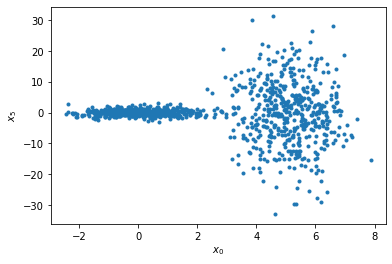

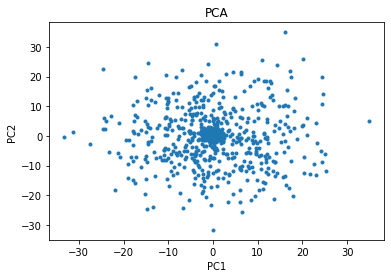

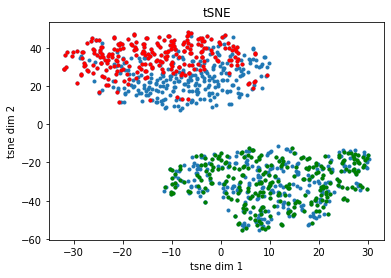

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# generate data
if True:
  X_A = np.random.normal(size=(10,500))
  X_B = np.zeros((10,500))
  X_B[:5,:] = np.random.normal(size=(5,500), loc=5.)
  X_B[5:,:] = np.random.normal(size=(5,500), scale=10.)

  X = np.concatenate([X_A, X_B], axis=1)

  # X (num_features x num_samples)


# Step 1: Plot what is really happening
plt.figure()
plt.plot(X[0,:], X[5,:], '.')
plt.xlabel('$x_0$')
plt.ylabel('$x_5$')

# Step 2: Apply PCA and plot top two latents
pca = PCA()

Z = pca.fit_transform(X.T).T    # (num_vars x num_samples)

plt.figure()
plt.plot(Z[0,:], Z[1,:], '.')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')

# Step 3: Apply tSNE...can it find the two clusters?
tsne = TSNE(n_components=2)

Z = tsne.fit_transform(X.T).T

plt.figure()

plt.plot(Z[0,:], Z[1,:], '.')

plt.xlabel('tsne dim 1')
plt.ylabel('tsne dim 2')
plt.title('tSNE')

inds_left = np.mean(X[:5,:],axis=0) < 0
inds_right = np.mean(X[:5,:], axis=0) > 5

plt.plot(Z[0,inds_left], Z[1,inds_left], '.r')
plt.plot(Z[0,inds_right], Z[1,inds_right], '.g')








# Section 3, t-SNE with many clusters (on your own)

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# generate data function
def generate_data(num_clusters=1, num_samples_per_cluster=25):
  # returns X (num_features, num_samples)
  X = []
  num_vars = 10
  for icluster in range(num_clusters):
    means = np.random.randint(low=-10,high=10,size=(num_vars,))[:,np.newaxis]
    means = np.tile(means, (1,num_samples_per_cluster))

    X.append(np.random.normal(loc=means))
  X = np.concatenate(X, axis=1)
  return X

# Task:
#   Generate data, varying the number of clusters in the set [5,10,20,30,40,50,75]
#   For each dataset, 
#     1. Apply PCA. Plot top 2 PCs.
#     2. Apply tSNE. Plot top 2 dims.
#   You should end up with 14 plots total. 
#   Bonus points: plot each cluster's plots side by side (hint: use 'plt.subplot(1,2,iplot)')
